In [1]:
import matplotlib.pyplot as plt

from image_io import *
from image_math import *
from image_frequencies import *

Text(0.5, 1.0, "<class 'torch.Tensor'>")

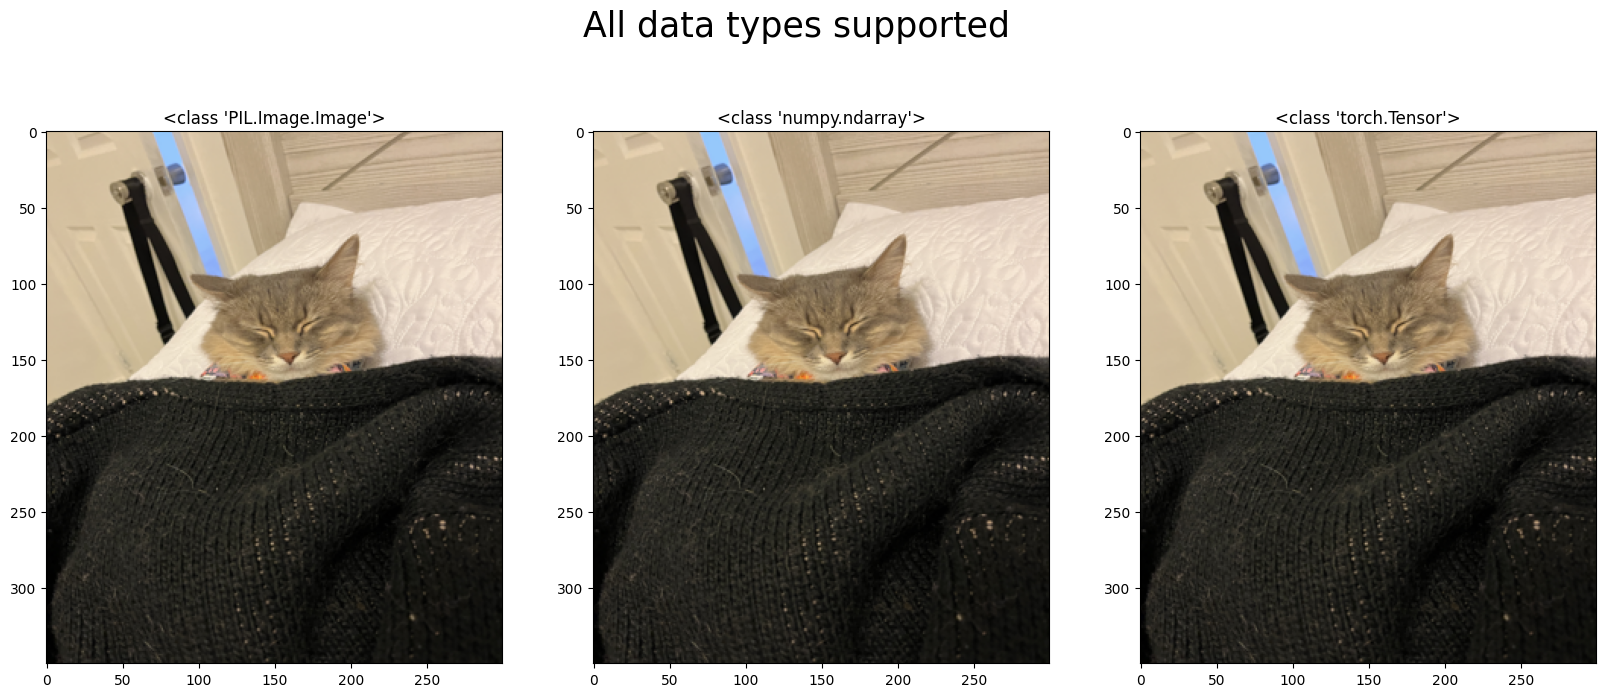

In [2]:
samples1 = [
    read_image(
        file_name="sleepy_tofu.jpg",
        directory_path="utils/samples/in",
        data_format="pil",
        out_size=(300, 350),
        grayscale=False,
    ),
    read_image(
        file_name="sleepy_tofu.jpg",
        directory_path="utils/samples/in",
        data_format="numpy",
        out_size=(300, 350),
        grayscale=False,
    ),
    read_image(
        file_name="sleepy_tofu.jpg",
        directory_path="utils/samples/in",
        data_format="tensor",
        out_size=(300, 350),
        grayscale=False,
    ),
]

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("All data types supported", fontsize=25)

ax[0].imshow(samples1[0])
ax[0].set_title(type(samples1[0]))

ax[1].imshow(samples1[1])
ax[1].set_title(type(samples1[1]))

ax[2].imshow(samples1[2].permute(1, 2, 0))
ax[2].set_title(type(samples1[2]))

/Users/naycal/Projects/BigPixels/utils/image_frequencies.py:202: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Convolution.cpp:1009.)
  return normalize_image(conv2d(image, kernel, padding="same").view(original_shape))


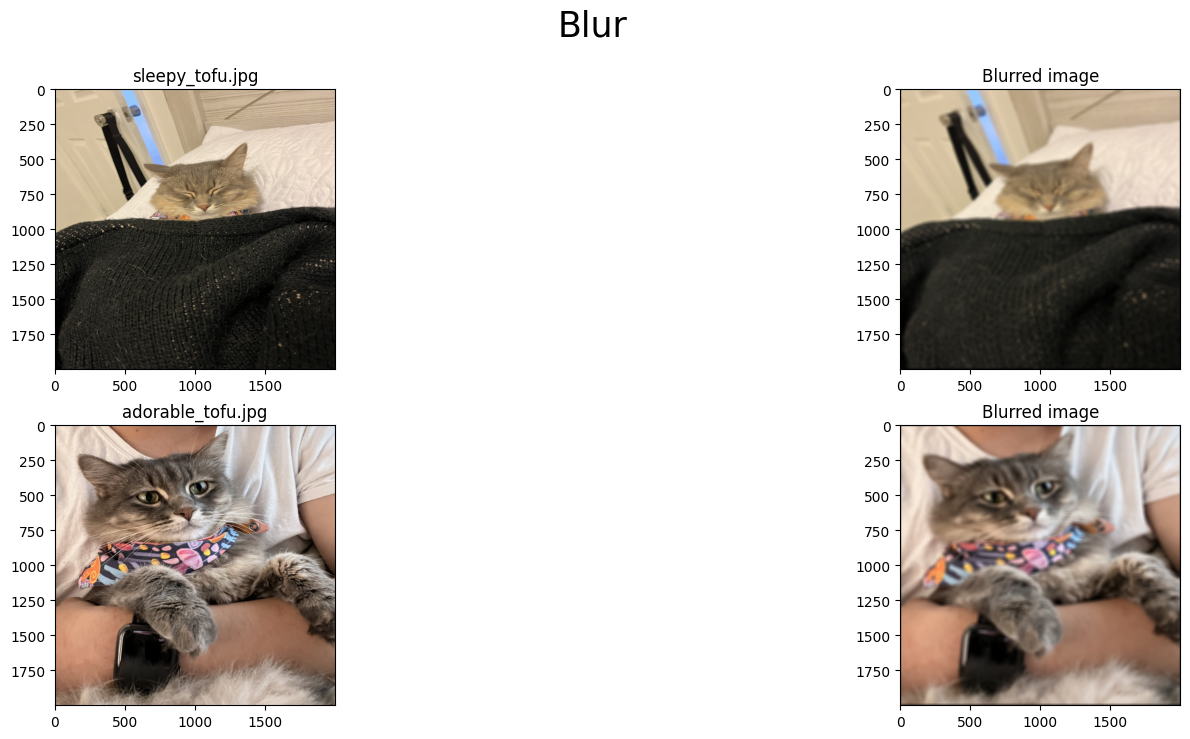

In [3]:
samples2, sample2_names = read_all_images(
    "utils/samples/in", "torch", out_size=(2000, 2000), grayscale=False
)
blurred_samples2 = image_blurr(samples2, ksize=30, ksigma=30, device="mps").cpu()

fig, ax = plt.subplots(len(samples2), 2, figsize=(20, 8))
fig.suptitle("Blur", fontsize=25)

for i, data in enumerate(zip(sample2_names, samples2, blurred_samples2)):
    name, sample, result = data
    ax[i, 0].imshow(sample.permute(1, 2, 0))
    ax[i, 0].set_title(name)

    ax[i, 1].imshow(result.permute(1, 2, 0))
    ax[i, 1].set_title("Blurred image")
    
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


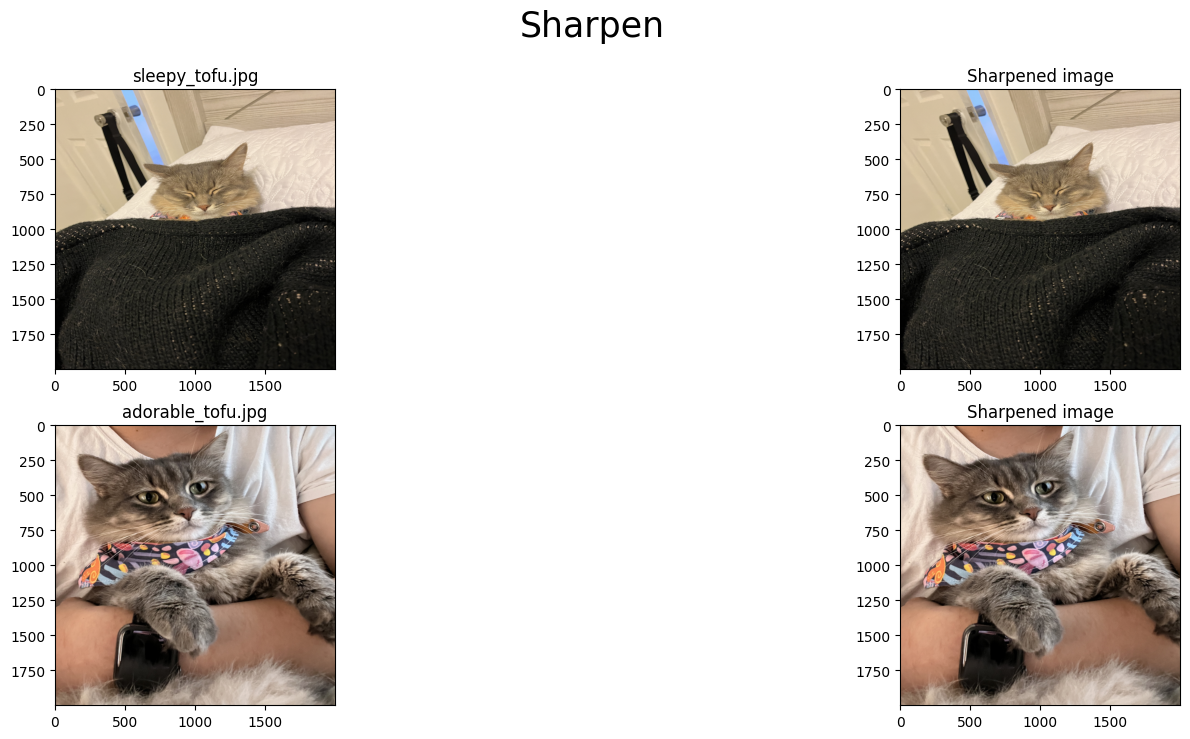

In [7]:
samples3, sample3_names = read_all_images(
    "utils/samples/in", "torch", out_size=(2000, 2000), grayscale=False
)
sharpened_samples3 = image_sharpen(samples3, alpha=0.5, ksize=3, ksigma=2, device="mps").cpu()

fig, ax = plt.subplots(len(samples2), 2, figsize=(20, 8))
fig.suptitle("Sharpen", fontsize=25)

for i, data in enumerate(zip(sample3_names, samples3, sharpened_samples3)):
    name, sample, result = data
    ax[i, 0].imshow(sample.permute(1, 2, 0))
    ax[i, 0].set_title(name)

    ax[i, 1].imshow(result.permute(1, 2, 0))
    ax[i, 1].set_title("Sharpened image")
    
plt.show()

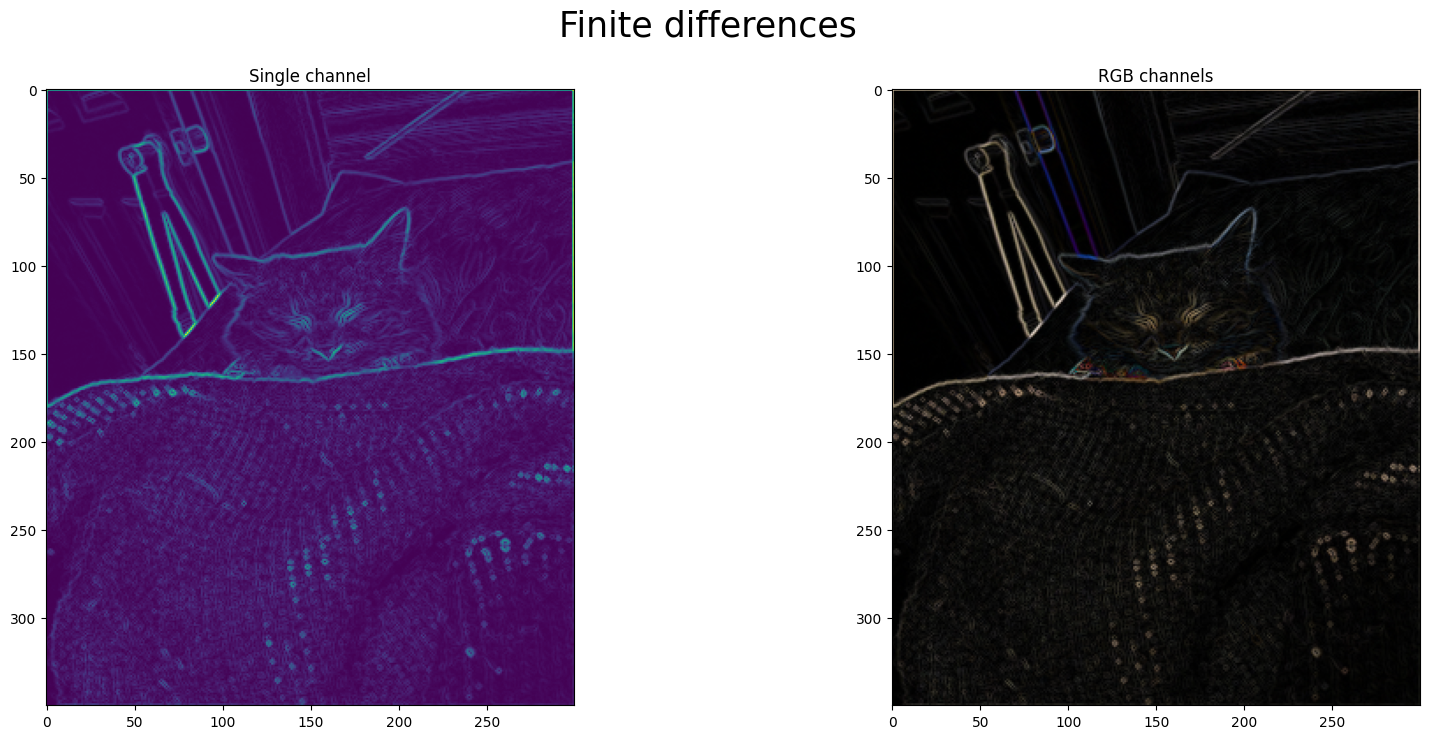

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Finite differences", fontsize=25)

ax[0].imshow(
    finite_difference(
        samples1[1],
        reduce_noise=False,
        out_grayscale=True,
        ksize=30,
        ksigma=30,
        threshold=None,
    )
)
ax[0].set_title("Single channel")


ax[1].imshow(
    finite_difference(
        samples1[2],
        reduce_noise=False,
        out_grayscale=False,
        ksize=30,
        ksigma=30,
        threshold=None,
    ).permute(1, 2, 0)
)
ax[1].set_title("RGB channels")
plt.show()